# Heart Disease Prediction Project

## Problem Statement

This project aims at building a machine learning classification model that predicts the occurance of Heart Disease.


Dataset Attributes

1. Age: Patients Age
2. Sex: Gender of patient
    0: Female
    1: Male
3. Chest Pain Type 
    1: Typical 
    2: Typical angina
    3: Non-anginal pain
    4: Asymptomatic
4. Resting BP: Level of blood pressure at resting mode in mm/HG
5. Cholestrol: Serum cholestrol in mg/dl
6. Fasting blood sugar: Blood sugar levels on fasting > 120 mg/dl
    0:False
    1:True
7. Resting ecg 
    0: Normal 
    1: Abnormality in ST-T wave 
    2: Left ventricular hypertrophy
8. Max heart rate: Maximum heart rate achieved
9. Exercise angina: Angina induced by exercise 
    0: No 
    1: Yes
10. Oldpeak: Exercise induced ST-depression
11. ST slope: ST segment measured in terms of slope during peak exercise 
    0: Normal 
    1: Upsloping 
    2: Flat 
    3: Downsloping
12. Target
    0: No heart disease
    1: Heart disease
    
Dataset URL: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

Combined dataset URL : https://github.com/Neethu-Ignacious/Simple-Machine-Learning-Models/blob/main/Heart_disease_data.csv

Below Heart disease databases are combined for the analysis.

Cleveland, Hungarian,Switzerland,Long Beach VA,Stalog


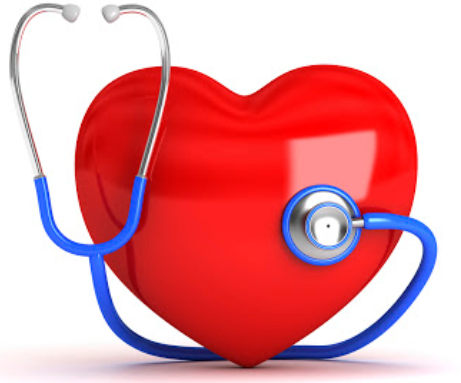



# Importing Libraries

In [1]:
#Data analysis and exploration libraries
import numpy as np
import pandas as pd

#Missing data handling library
from sklearn.impute import SimpleImputer

#Data Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install plotly
!pip install cufflinks
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import plotly.express as px
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

#Interquartile range library
from scipy.stats import iqr

#Splitting data library
from sklearn.model_selection import train_test_split

#Feature scaling library
from sklearn.preprocessing import StandardScaler

#Model building libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Cross validation library
from sklearn.model_selection import GridSearchCV

#Performance evaluation library
from sklearn.metrics import confusion_matrix,classification_report

# Dataset Analysis

### Dataset Import

In [2]:
#Importing the dataset to dataframe

data_frame = pd.read_csv('Heart_disease_data.csv')

### Shape of Dataset

In [3]:
#Shape of the dataset

print(data_frame.shape)

(1190, 12)


### Dataset Headers

In [4]:
#Dataset headers

print(data_frame.columns)

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')


### Head of Dataset

In [5]:
#First five rows of the dataset

data_frame.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


### Tail of Dataset

In [6]:
#Last five rows of the dataset

data_frame.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


### Dataset Information

In [7]:
#Dataset information

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   object 
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   object 
 6   resting ecg          1190 non-null   object 
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 111.7+ KB


### Datatypes

In [8]:
#Datatypes

print(data_frame.dtypes)

age                      int64
sex                      int64
chest pain type          int64
resting bp s            object
cholesterol              int64
fasting blood sugar     object
resting ecg             object
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object


# Data Cleaning and Preprocessing

### Header renaming

In [9]:
#Renaming column names

data_frame.columns=['age','sex','chest_pain','restbp','cholestrol','fbs','restecg','max_heart_rate',
                    'exercise_angine','oldpeak','ST_slope','target']

### Missing value analysis

In [10]:
#Replacing missing values with Nan

data_frame=data_frame.replace('Nan', np.nan)

In [11]:
#Missing value count

print(data_frame.isnull().sum())

age                 0
sex                 0
chest_pain          0
restbp             15
cholestrol          0
fbs                13
restecg            18
max_heart_rate      0
exercise_angine     0
oldpeak             0
ST_slope            0
target              0
dtype: int64


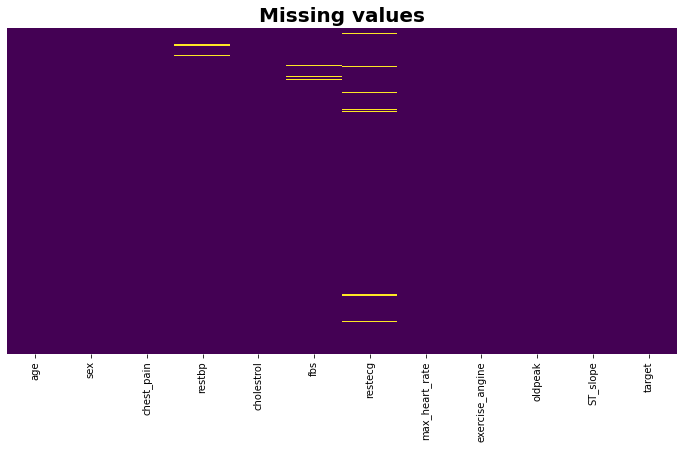

In [12]:
#Visualizing missing values

plt.figure(figsize=(12, 6))
plt.title("Missing values",size='20',weight='bold')
sns.heatmap(data_frame.isnull(),yticklabels=False,cbar=False,cmap='viridis');

### Missing value handling

In [13]:
#Missing data handling in column restbp

imp = SimpleImputer(missing_values=np.nan,strategy="mean")
imp = imp.fit(data_frame[['restbp']])
data_frame['restbp'] = imp.transform(data_frame[['restbp']]).ravel()

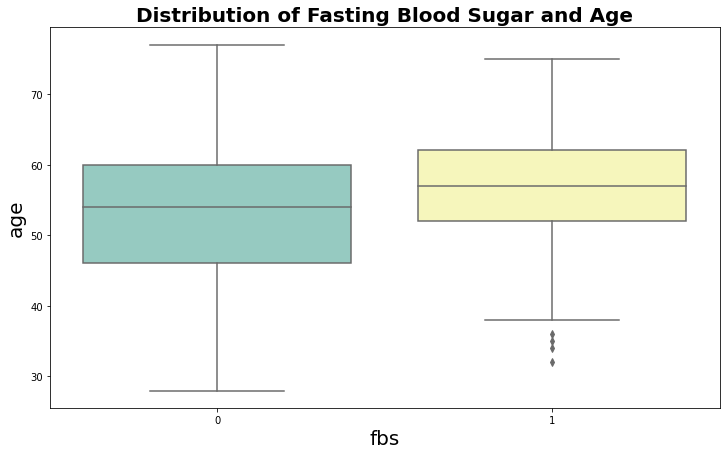

In [14]:
#Missing data handling in column fbs

#plotting boxplot to find the relation between fasting blood sugar and age
plt.figure(figsize=(12, 7))
plt.title("Distribution of Fasting Blood Sugar and Age",size='20',weight='bold')
plt.xlabel("Fasting Blood Sugar",size='20')
plt.ylabel("Age",size='20')
sns.boxplot(x='fbs',y='age',data=data_frame,palette='Set3');

#function to compute the fbs value
def impute_fbs(cols):
    age = cols[0]
    fbs = cols[1]
    
    if pd.isnull(fbs):
        if age <= 53 and age>=47:
            return 0
        elif age<40:
            return 1
        else:
            return 1

    else:
        return fbs

#function call
data_frame['fbs'] = data_frame[['age','fbs']].apply(impute_fbs,axis=1)

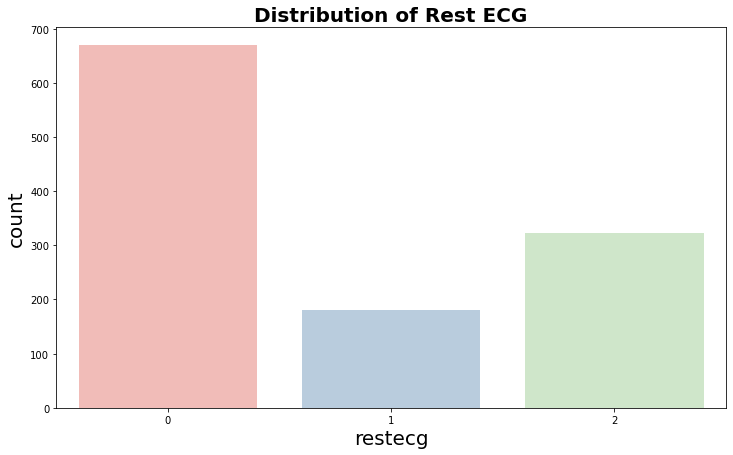

In [15]:
#Missing data handling in column restecg

#plotting countplot to check the most frequent value
plt.figure(figsize=(12, 7))
plt.title("Distribution of Rest ECG",size='20',weight='bold')
plt.xlabel("",size='20')
plt.ylabel("",size='20')
sns.countplot(data_frame.restecg,palette='Pastel1');

#filling missing value using fillna method
data_frame['restecg']=data_frame['restecg'].fillna(value=0)

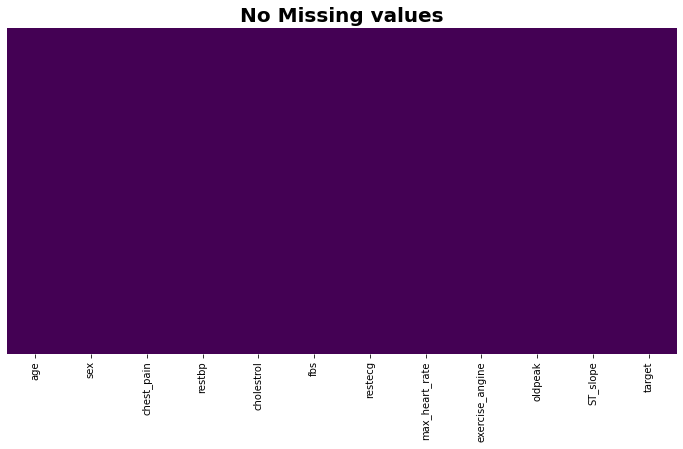

In [16]:
#Visualizing missing values

plt.figure(figsize=(12, 6))
plt.title("No Missing values",size='20',weight='bold')
sns.heatmap(data_frame.isnull(),yticklabels=False,cbar=False,cmap='viridis');

### Datatype Conversion

In [19]:
#Coverting columns to numeric datatype

data_frame["restbp"] = data_frame["restbp"].astype(str).astype(float)
data_frame["fbs"] = data_frame["fbs"].astype(str).astype(int)
data_frame["restecg"] = data_frame["restecg"].astype(str).astype(int)

# Statistical Data Analysis

### Statistical details of Dataset

In [20]:
#Statistical measures

data_frame.describe()

,age,sex,chest_pain,restbp,cholestrol,fbs,restecg,max_heart_rate,exercise_angine,oldpeak,ST_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.171064,210.363866,0.220168,0.694118,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.260212,101.420489,0.414534,0.869374,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


### Correlation of dataframe

In [21]:
#Coefficient of correlation

data_frame.corr()

,age,sex,chest_pain,restbp,cholestrol,fbs,restecg,max_heart_rate,exercise_angine,oldpeak,ST_slope,target
age,1.000000,0.015096,0.149055,0.254029,-0.046472,0.162888,0.193121,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.007131,-0.208441,0.109194,-0.020385,-0.181837,0.194380,0.096390,0.127913,0.311267
chest_pain,0.149055,0.138405,1.000000,0.006965,-0.109396,0.073769,0.033847,-0.337491,0.403428,0.224106,0.276949,0.460127
restbp,0.254029,-0.007131,0.006965,1.000000,0.100488,0.082743,0.098394,-0.100710,0.140531,0.172433,0.089667,0.122014
cholestrol,-0.046472,-0.208441,-0.109396,0.100488,1.000000,-0.233202,0.148425,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fbs,0.162888,0.109194,0.073769,0.082743,-0.233202,1.000000,0.026001,-0.122046,0.052048,0.028264,0.137645,0.209287
restecg,0.193121,-0.020385,0.033847,0.098394,0.148425,0.026001,1.000000,0.059208,0.039723,0.126891,0.093928,0.076325
max_heart_rate,-0.368676,-0.181837,-0.337491,-0.100710,0.238028,-0.122046,0.059208,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise_angine,0.188095,0.194380,0.403428,0.140531,-0.033261,0.052048,0.039723,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.172433,0.057451,0.028264,0.126891,-0.183688,0.370772,1.000000,0.524639,0.398385


### Central Tendency

In [22]:
#Central Tendency with mean

print("Central Tendency for each feature")
print(data_frame.mean())

Central Tendency for each feature
age                 53.720168
sex                  0.763866
chest_pain           3.232773
restbp             132.171064
cholestrol         210.363866
fbs                  0.220168
restecg              0.694118
max_heart_rate     139.732773
exercise_angine      0.387395
oldpeak              0.922773
ST_slope             1.624370
target               0.528571
dtype: float64


In [23]:
#Central Tendency with mode

print("Central Tendency for each feature")
data_frame.mode()

Central Tendency for each feature


,age,sex,chest_pain,restbp,cholestrol,fbs,restecg,max_heart_rate,exercise_angine,oldpeak,ST_slope,target
0,54,1,4,120.0,0,0,0,150,0,0.0,2,1


In [24]:
#Central Tendency with median

print("Central Tendency for each feature")
print(data_frame.median())

Central Tendency for each feature
age                 54.0
sex                  1.0
chest_pain           4.0
restbp             130.0
cholestrol         229.0
fbs                  0.0
restecg              0.0
max_heart_rate     140.5
exercise_angine      0.0
oldpeak              0.6
ST_slope             2.0
target               1.0
dtype: float64


In [25]:
#Central Tendency with max

print("Central Tendency for each feature")
print(data_frame.max())

Central Tendency for each feature
age                 77.0
sex                  1.0
chest_pain           4.0
restbp             200.0
cholestrol         603.0
fbs                  1.0
restecg              2.0
max_heart_rate     202.0
exercise_angine      1.0
oldpeak              6.2
ST_slope             3.0
target               1.0
dtype: float64


In [26]:
#Central Tendency with min

print("Central Tendency for each feature")
print(data_frame.min())

Central Tendency for each feature
age                28.0
sex                 0.0
chest_pain          1.0
restbp              0.0
cholestrol          0.0
fbs                 0.0
restecg             0.0
max_heart_rate     60.0
exercise_angine     0.0
oldpeak            -2.6
ST_slope            0.0
target              0.0
dtype: float64


In [27]:
#Standard deviation

print("standard deviation")
print(data_frame.std())

standard deviation
age                  9.358203
sex                  0.424884
chest_pain           0.935480
restbp              18.260212
cholestrol         101.420489
fbs                  0.414534
restecg              0.869374
max_heart_rate      25.517636
exercise_angine      0.487360
oldpeak              1.086337
ST_slope             0.610459
target               0.499393
dtype: float64


In [28]:
#Variance

print("Variance")
print(data_frame.var())

Variance
age                   87.575960
sex                    0.180527
chest_pain             0.875124
restbp               333.435337
cholestrol         10286.115598
fbs                    0.171838
restecg                0.755811
max_heart_rate       651.149724
exercise_angine        0.237520
oldpeak                1.180129
ST_slope               0.372660
target                 0.249393
dtype: float64


### Interquartile Range(IQR)

In [29]:
#InterQuartile Range

print("InterQuartile Range of Age:",iqr(data_frame['age']))
print("InterQuartile Range of Sex:",iqr(data_frame['sex']))
print("InterQuartile Range of Chest pain:",iqr(data_frame['chest_pain']))
print("InterQuartile Range of Rest BP:",iqr(data_frame['restbp']))
print("InterQuartile Range of Cholestrol:",iqr(data_frame['cholestrol']))
print("InterQuartile Range of Fasting Blood Sugar:",iqr(data_frame['fbs']))
print("InterQuartile Range of Rest ECG:",iqr(data_frame['restecg']))
print("InterQuartile Range of Maximum Heart Rate:",iqr(data_frame['max_heart_rate']))
print("InterQuartile Range of Excercise Angina:",iqr(data_frame['exercise_angine']))
print("InterQuartile Range of Oldpeak:",iqr(data_frame['oldpeak']))
print("InterQuartile Range of ST Slope:",iqr(data_frame['ST_slope']))
print("InterQuartile Range of Target:",iqr(data_frame['target']))


InterQuartile Range of Age: 13.0
InterQuartile Range of Sex: 0.0
InterQuartile Range of Chest pain: 1.0
InterQuartile Range of Rest BP: 20.0
InterQuartile Range of Cholestrol: 81.75
InterQuartile Range of Fasting Blood Sugar: 0.0
InterQuartile Range of Rest ECG: 2.0
InterQuartile Range of Maximum Heart Rate: 39.0
InterQuartile Range of Excercise Angina: 1.0
InterQuartile Range of Oldpeak: 1.6
InterQuartile Range of ST Slope: 1.0
InterQuartile Range of Target: 1.0


### Skewness

In [30]:
#Skewness

print("Skewness")
print(data_frame.skew())

Skewness
age               -0.192111
sex               -1.244149
chest_pain        -0.885643
restbp             0.291356
cholestrol        -0.781646
fbs                1.352376
restecg            0.634277
max_heart_rate    -0.233098
exercise_angine    0.462880
oldpeak            1.094006
ST_slope           0.405089
target            -0.114617
dtype: float64


# Data Visualization

### Correlation of Dataframe

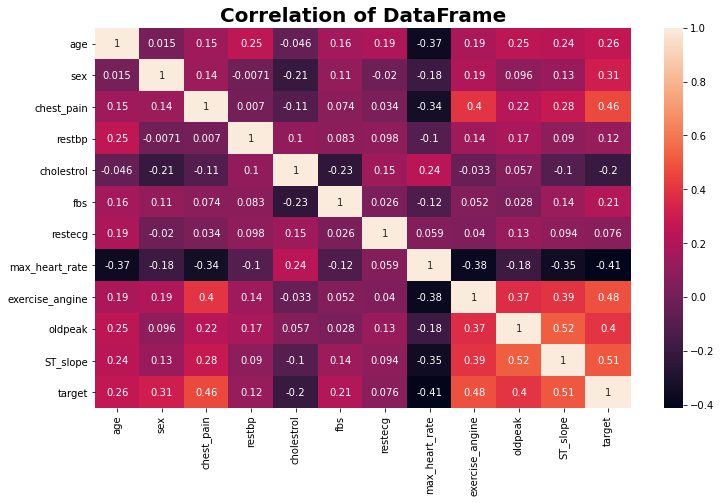

In [31]:
#Correlation

plt.figure(figsize=(12, 7))
plt.title("Correlation of DataFrame",size='20',weight='bold')
sns.heatmap(data_frame.corr(),annot=True);

### Distribution of Heart Disease

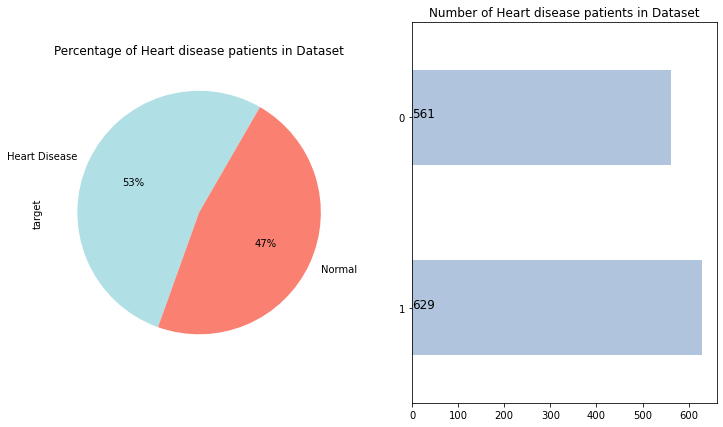

In [32]:
#Distribution of Heart disease

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(12,7))

ax1 = data_frame['target'].value_counts().plot.pie( colors=['powderblue','Salmon'],autopct = "%1.0f%%",
                                                   labels=["Heart Disease","Normal"], startangle = 60,ax=ax1); 
            
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = data_frame["target"].value_counts().plot(kind="barh" ,ax =ax2,color='lightsteelblue')
for i,j in enumerate(data_frame["target"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'Number of Heart disease patients in Dataset')
plt.show()

### Age Analysis

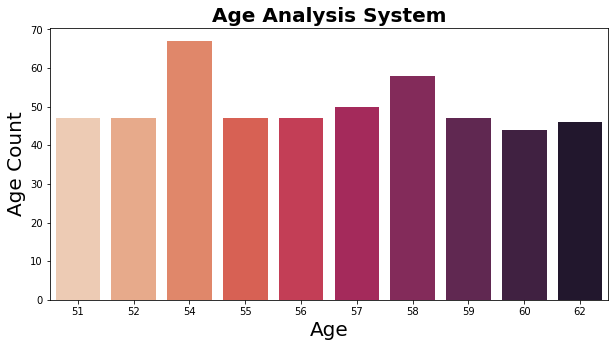

In [33]:
#Age Analysis

plt.figure(figsize=(10, 5))
sns.barplot(x=data_frame.age.value_counts()[:10].index,y=data_frame.age.value_counts()[:10].values,palette='rocket_r')
plt.xlabel('Age',size='20')
plt.ylabel('Age Count',size='20')
plt.title('Age Analysis System',size='20',weight='bold')
plt.show()


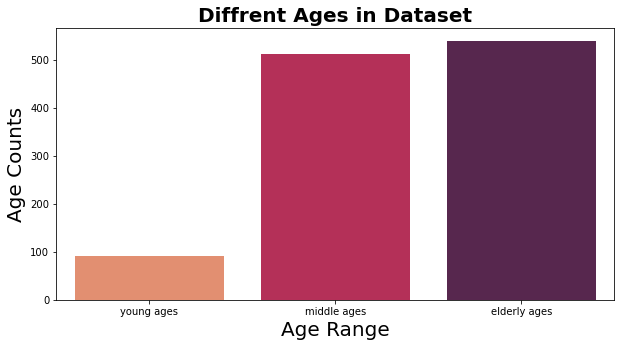

In [34]:
#Different Ages in Dataset

plt.figure(figsize=(10, 5))
minAge=min(data_frame.age)
maxAge=max(data_frame.age)
meanAge=data_frame.age.mean()
young_ages=data_frame[(data_frame.age>=29)&(data_frame.age<40)]
middle_ages=data_frame[(data_frame.age>=40)&(data_frame.age<55)]
elderly_ages=data_frame[(data_frame.age>55)]
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),
                                                             len(elderly_ages)],palette='rocket_r')
plt.xlabel('Age Range',size='20')
plt.ylabel('Age Counts',size='20')
plt.title('Diffrent Ages in Dataset',size='20',weight='bold')
plt.show()

### Pairwise relationship of Age, Rest BP and Cholestrol

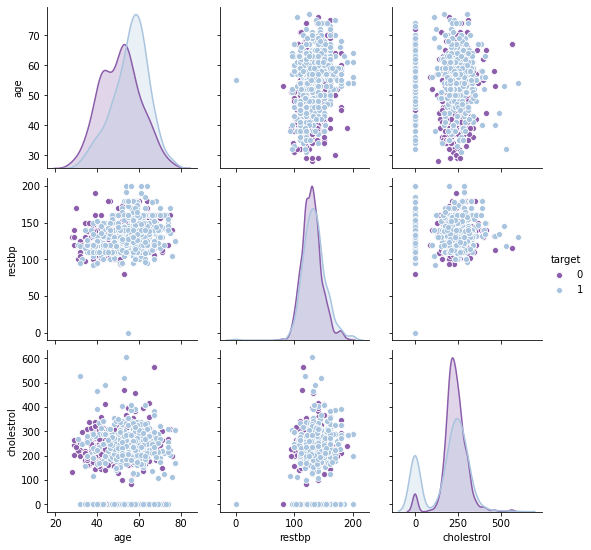

In [35]:
#Pairplot

sns.pairplot(data_frame, hue = 'target', vars = ['age', 'restbp', 'cholestrol'],palette='BuPu_r');
plt.show()

### Distribution graph of Age and Gender of Heart Disease and Normal patients

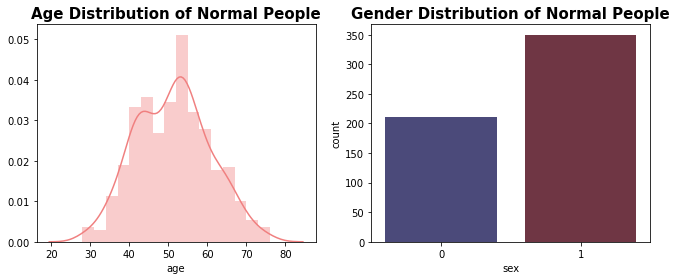

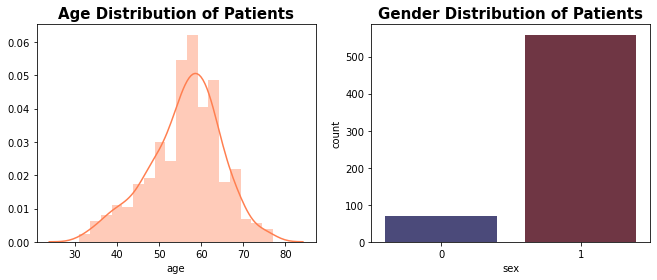

In [36]:
#Distribution graph of Age and Gender of Heart Disease and Normal patients

attr_1=data_frame[data_frame['target']==1]
attr_0=data_frame[data_frame['target']==0]

fig = plt.figure(figsize=(11,4))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_0['age'],color='lightcoral');
plt.title('Age Distribution of Normal People', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_0['sex'], palette='icefire');
plt.title('Gender Distribution of Normal People', fontsize=15, weight='bold' )
plt.show()

fig = plt.figure(figsize=(11,4))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(attr_1['age'],color='coral');
plt.title('Age Distribution of Patients', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(attr_1['sex'], palette='icefire');
plt.title('Gender Distribution of Patients', fontsize=15, weight='bold' )
plt.show()

### Heart Disease Frequency for Male and Female Ages

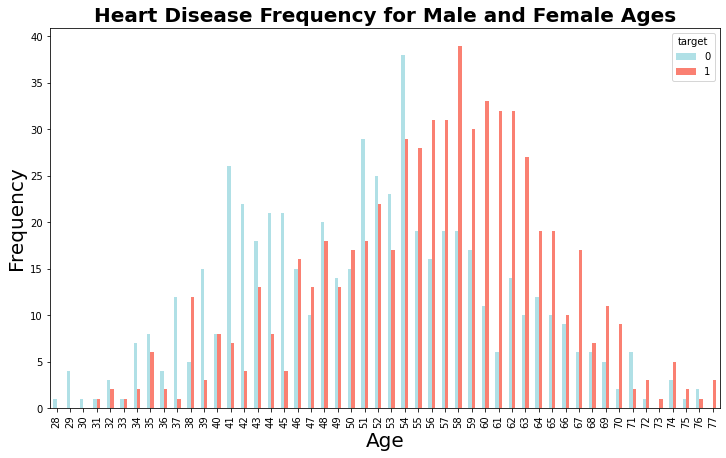

In [37]:
#Heart Disease Frequency for Male and Female Ages

pd.crosstab(data_frame.age,data_frame.target).plot(kind="bar",figsize=(12,7),color=['powderblue','Salmon'])
plt.title('Heart Disease Frequency for Male and Female Ages',weight='bold',size='20')
plt.xlabel('Age',size='20')
plt.ylabel('Frequency',size='20')
plt.show()

### Relation with Rest BP and Cholestrol

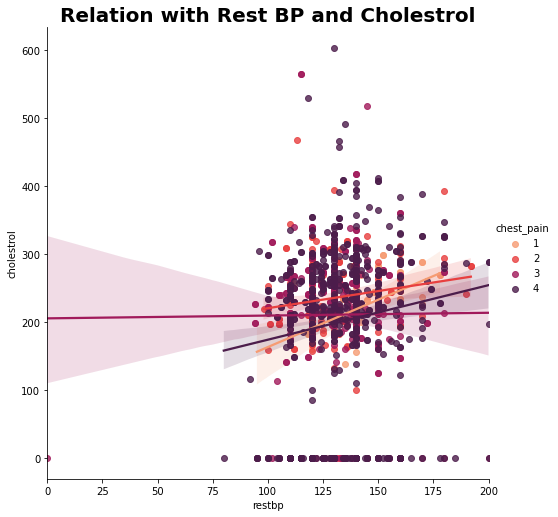

In [38]:
# linear regression within each dataset

sns.lmplot(x="restbp", y="cholestrol",data=data_frame,hue="chest_pain",palette='rocket_r',height=7)
plt.title("Relation with Rest BP and Cholestrol",size='20',weight='bold')
plt.show()

### Distribution of Slope rates with Gender

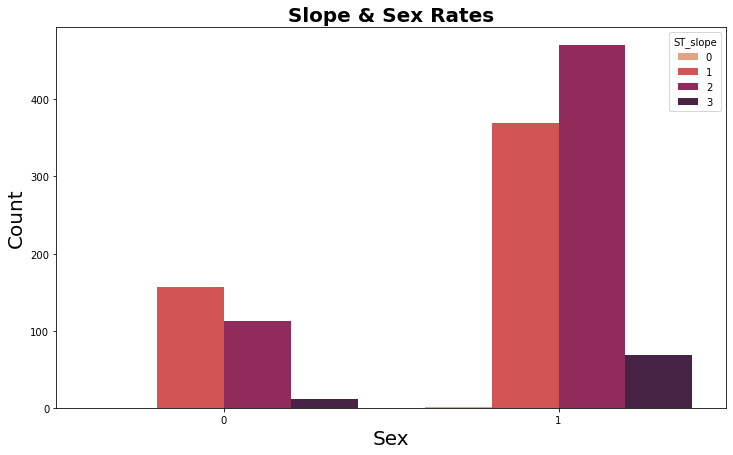

In [39]:
#Slope and Sex rates

plt.figure(figsize=(12, 7))
sns.countplot(data_frame.sex,hue=data_frame.ST_slope,palette='rocket_r')
plt.title('Slope & Sex Rates',size='20',weight='bold')
plt.xlabel('Sex',size='20')
plt.ylabel('Count',size='20')
plt.show()

### Illustration of Maximum heart rate to degree of chest pain

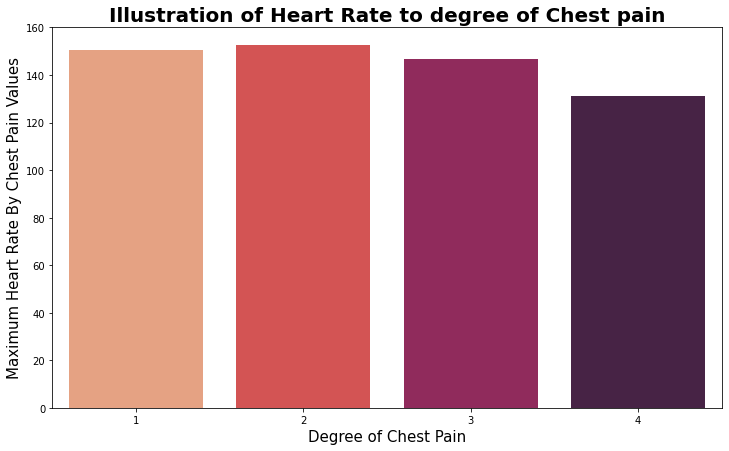

In [40]:
#Illustration of thalach to degree of chest pain

chestpain_thalach=data_frame.groupby('chest_pain')['max_heart_rate'].mean()
plt.figure(figsize=(12, 7))
sns.barplot(x=chestpain_thalach.index,y=chestpain_thalach.values,palette='rocket_r')
plt.xlabel('Degree of Chest Pain',size='15')
plt.ylabel('Maximum Heart Rate By Chest Pain Values',size='15')
plt.title('Illustration of Heart Rate to degree of Chest pain',size='20',weight='bold')
plt.show()

### Relationship between Cholestrol and Maximum Heart Rate

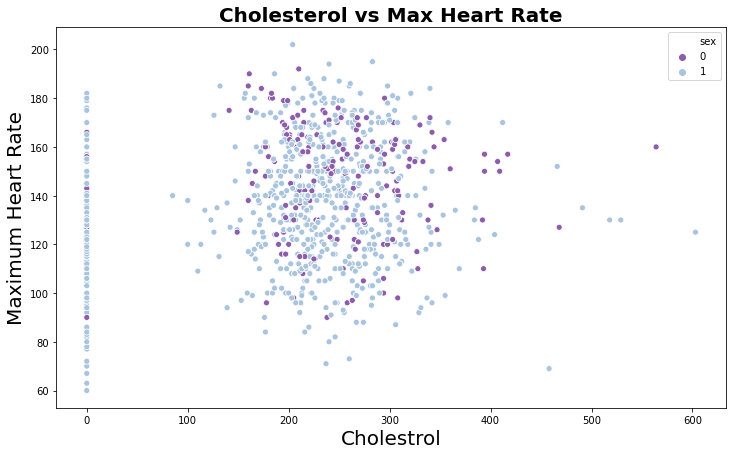

In [41]:
#Cholesterol vs Maximum Heart Rate

plt.rcParams['figure.figsize'] = (12,7)
sns.scatterplot(x='cholestrol', y='max_heart_rate', hue='sex', size=None, data=data_frame,palette='BuPu_r')
plt.title('Cholesterol vs Max Heart Rate',size='20',weight='bold');
plt.ylabel('Maximum Heart Rate',size='20');
plt.xlabel('Cholestrol',size='20');

### Relationship between Excercise Angina and Oldpeak

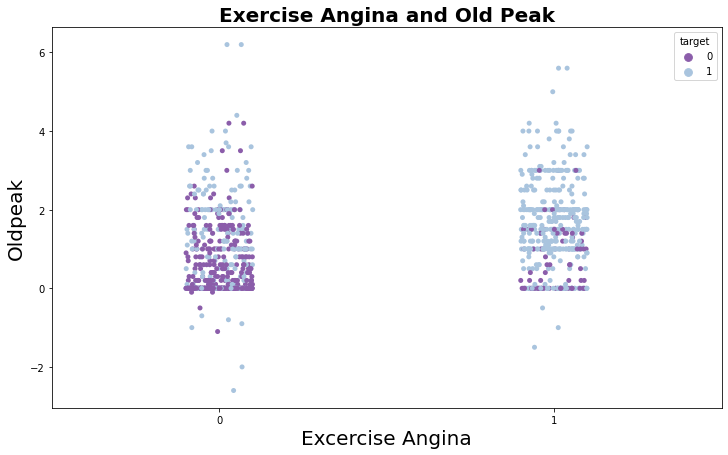

In [42]:
#Excerise Angina and Old Peak relation

plt.figure(figsize=(12,7))
sns.stripplot(data=data_frame,x='exercise_angine',y='oldpeak',hue='target',palette='BuPu_r')
plt.title("Exercise Angina and Old Peak",weight='bold',size='20')
plt.xlabel("Excercise Angina",size='20')
plt.ylabel("Oldpeak",size='20')
plt.show()

### Interactive Graph 1

In [43]:
#Interative graph 1 using plotly to visualize values in dataset. Execute code to view the results
df=data_frame[['age','restbp','cholestrol','max_heart_rate','oldpeak']]
df.iplot(kind='box',title="Interactive Graph 1",size=20)

Interactive graph 1 image

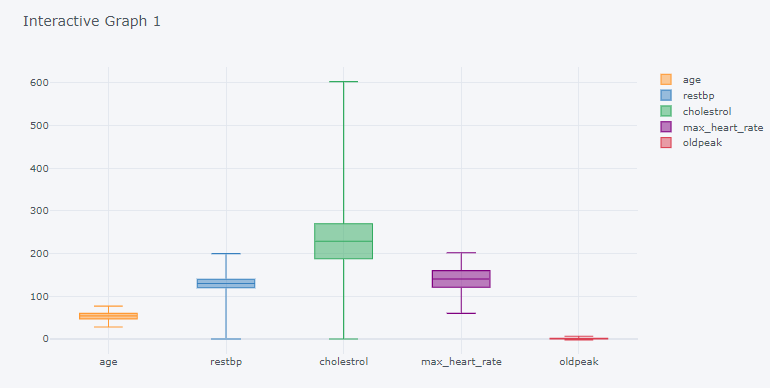

### Interactive Graph 2

In [45]:
#Interactive graph 2. Execute code to view the results
data_frame[['restbp','max_heart_rate']].iplot(kind='spread',colors=['lightpink','maroon'],title="Interactive Graph 2",
                                              gridcolor='lightsalmon')

Interactive Graph 2 image

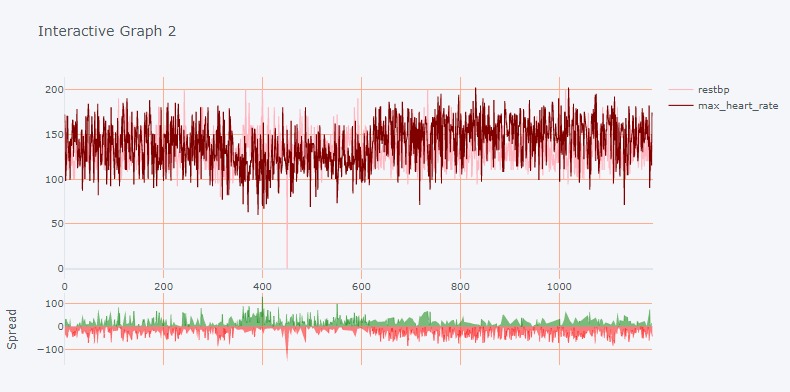

### Interactive Graph 3

In [46]:
#Interactive graph 3. Execute code to view the results
fig = px.scatter(data_frame, x="cholestrol", y="chest_pain",
              color="age", color_continuous_scale='Inferno',title="Interactive Graph 3")
fig.show()

Interactive graph 3 image

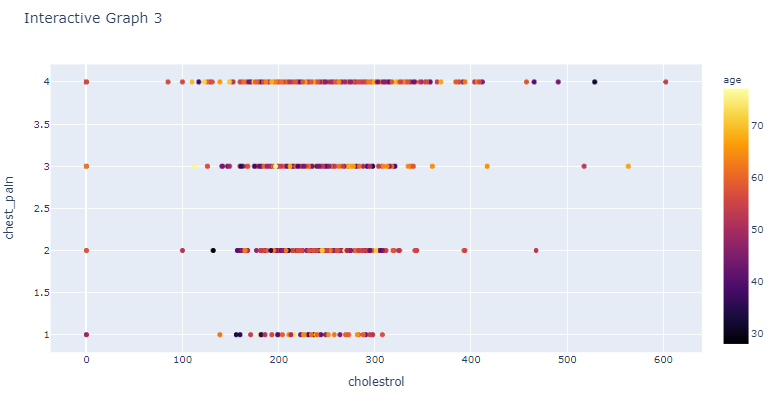

# Model Building

### Feature Encoding

In [47]:
#Feature Encoding

chest_pain = pd.get_dummies(data_frame['chest_pain'],drop_first=True)
restecg = pd.get_dummies(data_frame['restecg'],drop_first=True)
slope = pd.get_dummies(data_frame['ST_slope'],drop_first=True)

chest_pain.columns=['atypical','non-anginal','asymptomatic']
restecg.columns=['restecg1','restecg2']
slope.columns=['upslope','flatslope','downslope']

data_frame = pd.concat([data_frame,chest_pain,restecg,slope],axis=1)
data_frame.drop(['chest_pain','restecg','ST_slope'],axis=1,inplace=True)

data_frame=data_frame[['age','restbp','cholestrol','max_heart_rate','oldpeak',
               'sex','fbs','exercise_angine','atypical','non-anginal','asymptomatic','restecg1','restecg2',
               'upslope','flatslope','downslope','target']]

### Data Splitting

In [48]:
#Data Splitting

X = data_frame.iloc[:, :-1].values
y = data_frame.iloc[:, -1].values

#80% training set and 20% test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

### Feature Scaling

In [49]:
#Feature scaling

sc=StandardScaler()
X_train[:,0:4]=sc.fit_transform(X_train[:,0:4])
X_test[:,0:4]=sc.transform(X_test[:,0:4])

## Classification Model

### Logistic Regression Model

In [50]:
#Logistic Regression Model

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [51]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)
print('\nAccuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Confusion matrix of Train Data

[[375  69]
 [ 75 433]]

Confusion matrix of Test Data

[[ 97  17]
 [ 14 110]]

Accuracy for training set for svm = 0.8487394957983193
Accuracy for test set for svm = 0.8697478991596639


### Performance and Evaluation of Logistic Model

In [52]:
#Classification report of Logistic Regression Model

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       111
           1       0.89      0.87      0.88       127

    accuracy                           0.87       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.87      0.87      0.87       238



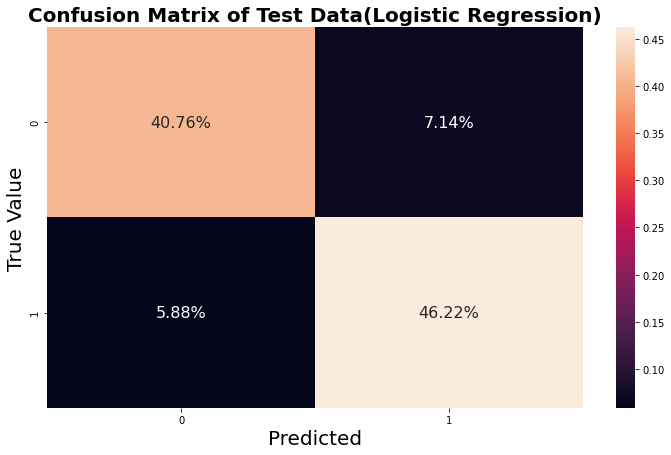

In [53]:
#Confusion matrix visualization

plt.figure(figsize=(12, 7))
sns.heatmap(cm_test/np.sum(cm_test), annot=True,fmt='.2%',annot_kws={"size": 16})
plt.title("Confusion Matrix of Test Data(Logistic Regression)",size='20',weight='bold')
plt.xlabel("Predicted",size='20')
plt.ylabel("True Value",size='20')
plt.show()

### Support Vector Machine Model

In [54]:
#SVM Model

classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [55]:
# Predicting the Test and Test set results

y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)

cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)

print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)
print('\nAccuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Confusion matrix of Train Data

[[395  49]
 [ 55 453]]

Confusion matrix of Test Data

[[ 98  13]
 [ 13 114]]

Accuracy for training set for svm = 0.8907563025210085
Accuracy for test set for svm = 0.8907563025210085


### Performance and Evaluation of Support Vector Machine

In [56]:
#Classification report of Support Vector Machine Model

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       111
           1       0.90      0.90      0.90       127

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238



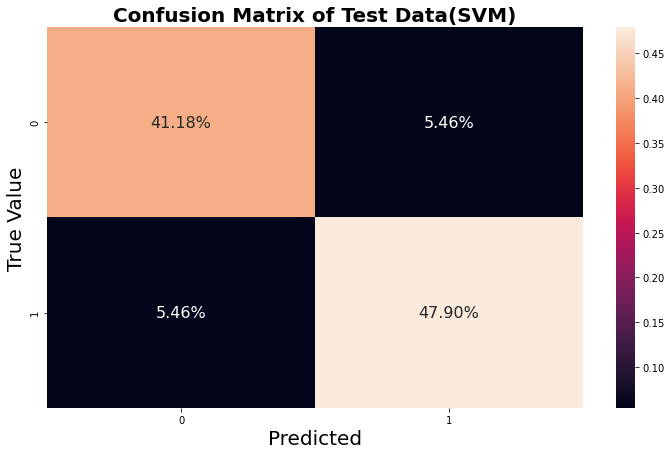

In [57]:
#Confusion Matrix visualization of SVM model

plt.figure(figsize=(12, 7))
sns.heatmap(cm_test/np.sum(cm_test), annot=True,fmt='.2%',annot_kws={"size": 16})
plt.title("Confusion Matrix of Test Data(SVM)",size='20',weight='bold')
plt.xlabel("Predicted",size='20')
plt.ylabel("True Value",size='20')
plt.show()


### Hyper Parameter tuning and Cross Validation

In [58]:
#Cross validation using GridSearch 

param_grid = {'C':[0.1,1, 10, 100, 1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3);
grid.fit(X_train,y_train)
print(grid.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.555, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.555, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.563, total=   0.1s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.563, total=   0.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.558, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.827, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.853, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.853, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.837, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.795, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    4.8s finished


### SVM Model with tuned parameters

In [59]:
#SVM Model with cross validation

classifier = SVC(C = 10, gamma = 1, kernel = 'rbf')
classifier.fit(X_train, y_train)


SVC(C=10, gamma=1)

In [60]:
# Predicting the Test and Train set results

y_pred = classifier.predict(X_test)
y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
cm_test = confusion_matrix(y_pred, y_test)
print("\nConfusion matrix of Train Data\n")
print(cm_train)
print("\nConfusion matrix of Test Data\n")
print(cm_test)
print('\nAccuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Confusion matrix of Train Data

[[450   0]
 [  0 502]]

Confusion matrix of Test Data

[[100   5]
 [ 11 122]]

Accuracy for training set for svm = 1.0
Accuracy for test set for svm = 0.9327731092436975


### Performance and Evaluation of SVM Model after Cross validation

In [61]:
#Classification report of SVM Model

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       111
           1       0.92      0.96      0.94       127

    accuracy                           0.93       238
   macro avg       0.93      0.93      0.93       238
weighted avg       0.93      0.93      0.93       238



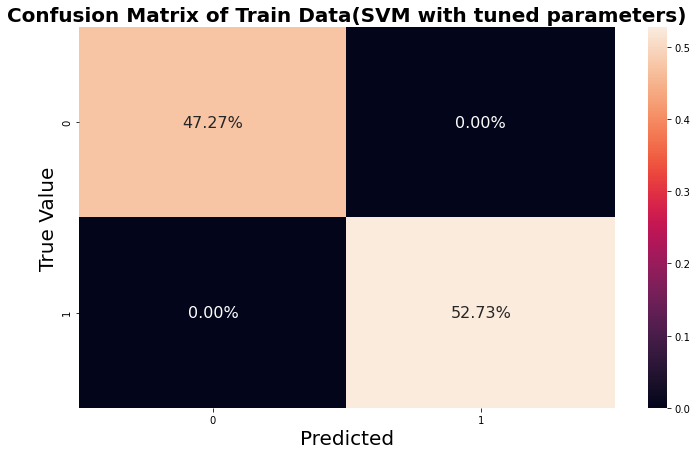

In [62]:
#Visualizing the confusion matrix of SVM model in training dataset

plt.figure(figsize=(12, 7))
sns.heatmap(cm_train/np.sum(cm_train), annot=True,fmt='.2%',annot_kws={"size": 16})
plt.title("Confusion Matrix of Train Data(SVM with tuned parameters)",size='20',weight='bold')
plt.xlabel("Predicted",size='20')
plt.ylabel("True Value",size='20')
plt.show()

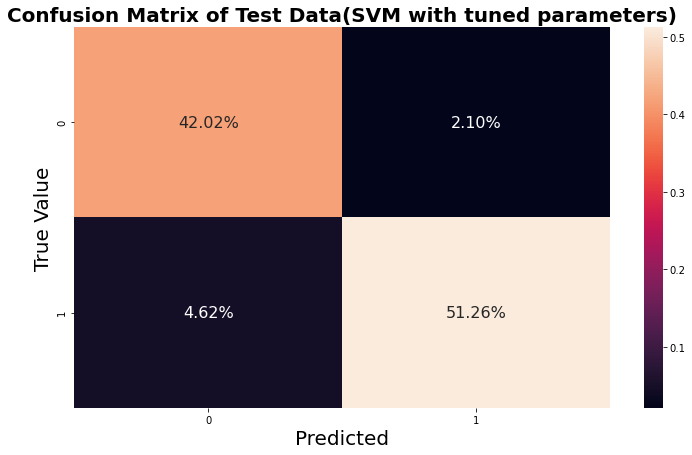

In [63]:
#Visualizing the confusion matrix of SVM model in test dataset

plt.figure(figsize=(12, 7))
sns.heatmap(cm_test/np.sum(cm_test), annot=True,fmt='.2%',annot_kws={"size": 16})
plt.title("Confusion Matrix of Test Data(SVM with tuned parameters)",size='20',weight='bold')
plt.xlabel("Predicted",size='20')
plt.ylabel("True Value",size='20')
plt.show()

## Proposed Model

SVM classification model is proposed for Heart Disease prediction which provides an accuracy of 93%.